### Applying the Inverse Transform Method to Discrete Distributions

While the Inverse Transform method is conceptually straightforward for continuous distributions, it requires some adaptation for discrete distributions. This is because the CDF of a discrete distribution is a step function, meaning it jumps in discrete steps rather than changing smoothly.
To apply the Inverse Transform method to a discrete distribution, we follow these steps:
Obtain the CDF F(x) of the discrete distribution. This is usually done by summing up the probabilities of the individual values up to x.
Generate a random number u from a uniform distribution between 0 and 1.
Find the smallest value x such that F(x) is greater than or equal to u. This is essentially finding the step in the CDF where u falls.
The corresponding x value is the random number generated from the desired discrete distribution.
This adaptation ensures that the generated random numbers accurately reflect the probabilities of the discrete distribution1.


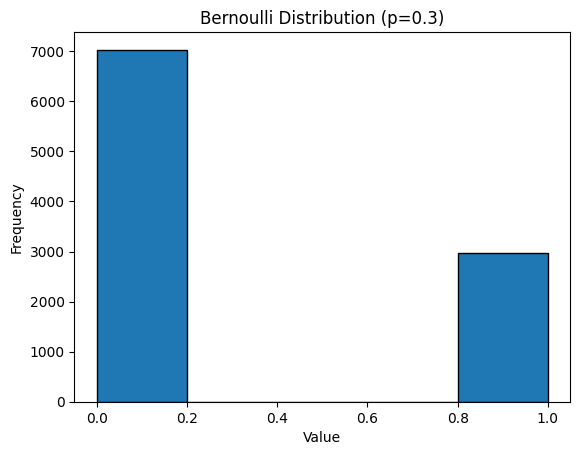

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_inverse_transform(p, n_samples):
    """Generates random numbers from a Bernoulli distribution.

    Args:
      p: Probability of success.
      n_samples: Number of random numbers to generate.

    Returns:
      An array of random numbers from a Bernoulli distribution.
    """
    u = np.random.uniform(size=n_samples)
    x = (u > 1 - p).astype(int)
    return x

# Generate 10000 random numbers from Bernoulli(p=0.3)
p = 0.3
n_samples = 10000
samples = bernoulli_inverse_transform(p, n_samples)

# Plot the results
plt.hist(samples, bins=5, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Bernoulli Distribution (p=0.3)')
plt.show()


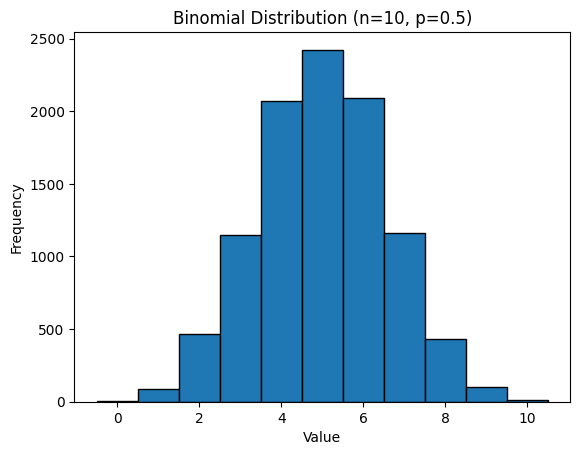

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def binomial_inverse_transform(n, p, n_samples):
    """Generates random numbers from a Binomial distribution.

    Args:
      n: Number of trials.
      p: Probability of success in each trial.
      n_samples: Number of random numbers to generate.

    Returns:
      An array of random numbers from a Binomial distribution.
    """
    u = np.random.uniform(size=n_samples)
    x = np.array([binom.ppf(u_i, n, p) for u_i in u])
    return x

# Generate 10000 random numbers from Binomial(n=10, p=0.5)
n = 10
p = 0.5
n_samples = 10000
samples = binomial_inverse_transform(n, p, n_samples)

# Plot the results
plt.hist(samples, bins=np.arange(-0.5, n + 1.5, 1), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.show()

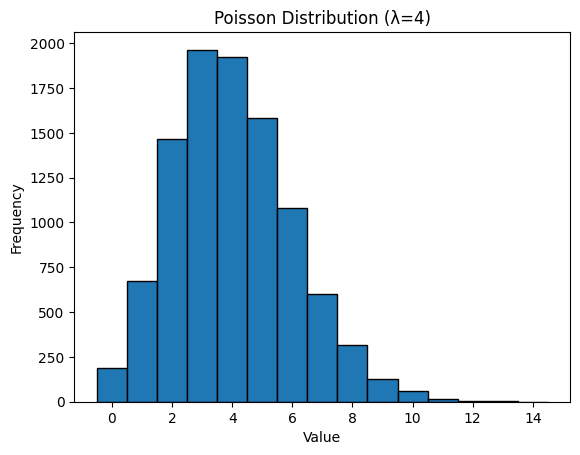

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def poisson_inverse_transform(lam, n_samples):
    """Generates random numbers from a Poisson distribution.

    Args:
      lam: Average rate of events.
      n_samples: Number of random numbers to generate.

    Returns:
      An array of random numbers from a Poisson distribution.
    """
    u = np.random.uniform(size=n_samples)
    x = np.array([poisson.ppf(u_i, lam) for u_i in u])
    return x

# Generate 10000 random numbers from Poisson(λ=4)
lam = 4
n_samples = 10000
samples = poisson_inverse_transform(lam, n_samples)

# Plot the results
plt.hist(samples, bins=np.arange(-0.5, max(samples) + 1.5, 1), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson Distribution (λ=4)')
plt.show()


 The probability Integral Transformation states
1. If continious random variable X has a CDF F(x), then a random variable U defined as U = F(x) has a normal distrobution



In [2]:
# Show with an example of code
from imports import *
# 1. Generate random samples X from a normal distribution
N = 10_000
X = gamma.rvs(loc=0, scale=1, size=N, random_state=42, a=1)
# 2. Compute Y = F_X(X) where F_X is the CDF of the Gamma distribution
Y = gamma.cdf(X, a= 1)  # This is the Probability Integral Transform
plot_hist_and_cdf(X, Y, N, "Gamma Distribution")


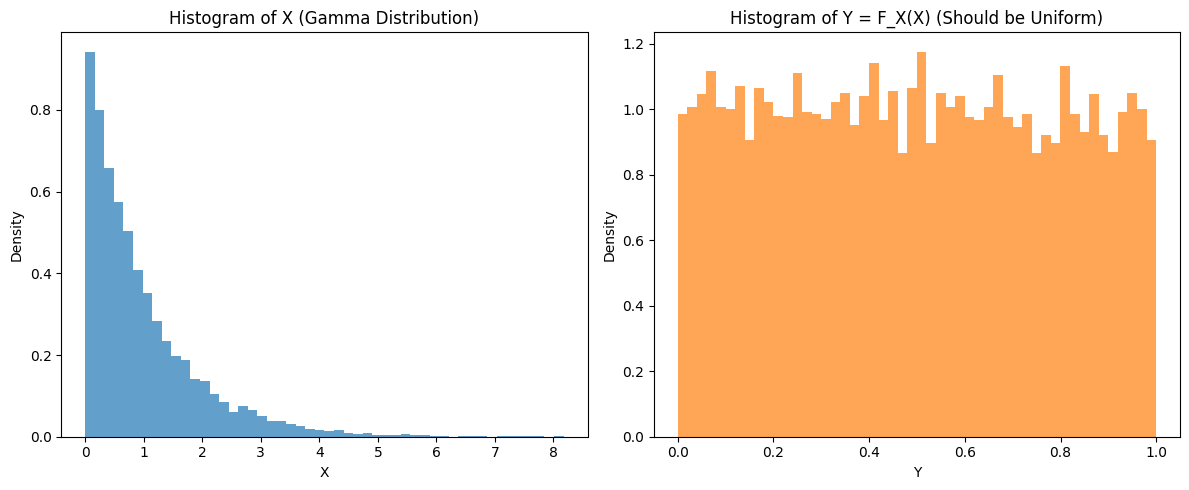

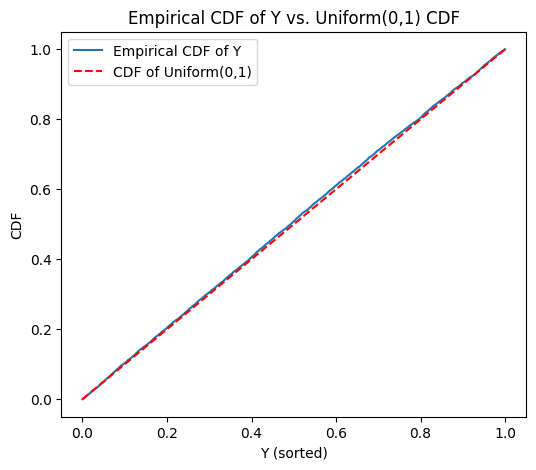

Two things to attack here
1. The proof of this
2. Discrete case, and why.
3. Taking the inverse of functions



# Apart of the three things I learnt


I think there is some mental herdals for me to overcome to get this.
<!-- 
1. Do we use the uniform discrete form or uniform form?
    a. Does it matter? -->


1. What if we didn't take a random sample from the uniform distrobution? What if we took equally spaced values?
The short answer is that if you want true random samples from your target distribution, then, yes, you really do need to generate random numbers from a (pseudo)uniform distribution and apply the inverse CDF to them.

If you only take equally spaced points in [0,1][0,1] (for instance, 0.01, 0.02, 0.03, …), and apply the inverse CDF, you will produce deterministic sample points (often called a quantile grid). While these points might give you a nice visualization of the shape of the distribution, or serve other numerical approximations, they do not represent the kind of random variability you get from genuine sampling.


2. What is the inverse CDF of discrete functions? More specifically how does the bucketing of values turn out?

3. What is a Quantile Grid/Quantile regression

A "quantile grid" is a visual representation of data where the data is divided into different quantiles (equal portions) along one axis, and another variable is plotted on the other axis, essentially creating a grid-like structure that allows for easy comparison of data distribution across different quantile ranges; it's often used in conjunction with a concept called "quantile regression" to analyze how a variable changes across different quantiles of another variabl

4. What if we didn't use the continious form of the uniform distrobution, but we use the discrete form? How would that change the results? What are the matematical implications of that?

